# <center> Week - 4 Assignment - Clustering Exercise

<center> DSC-630

<center> Kalyan Pothineni

# Introduction
Amyotrophic Lateral Sclerosis (ALS) is a progressive neurodegenerative disease that affects nerve cells in the brain and the spinal cord, leading to loss of muscle control and, ultimately, paralysis [1]. 

Despite significant research, the underlying mechanisms and progression patterns of ALS remain poorly understood, and patient outcomes can vary widely. This variability suggests the existence of different ALS subtypes or progression rates, which, if identified, could significantly impact treatment strategies and patient care.
This project will explore a dataset of anonymized clinical and demographic information from ALS patients. Our primary objective is to apply data clustering techniques to uncover patterns within this dataset that suggest subgroups among ALS patients. These subgroups could represent different disease subtypes or progression patterns, offering valuable insights for personalized treatment approaches and further research.
Our analysis will proceed through the following steps:
Data Cleaning and Preparation: We will begin by examining the dataset to identify and remove any variables that are not relevant to the ALS condition, focusing on clinical measures and demographic information that could provide insights into disease patterns.
- __Data Standardization__: Given the diverse range of variables involved, we will standardize the data to ensure that all features contribute equally to the analysis. This step is crucial for the effectiveness of clustering algorithms.
- __Optimal Cluster Identification__: We will use the K-means clustering algorithm to identify distinct groups within the data. We will determine the optimal number of clusters by evaluating silhouette scores, which measure how similar an object is to its cluster compared to others.
- __Dimensionality Reduction and Visualization__: We will apply Principal Component Analysis (PCA) to reduce the dataset to two dimensions, making it possible to visualize the clustering results. This visualization will help us understand patient distribution across the identified clusters.
- __Interpretation and Conclusion__: Finally, we will interpret the clustering outcomes to identify potential ALS subtypes or progression patterns. Our analysis aims to provide a foundation for further research into personalized ALS treatments and deepen our understanding of this complex disease.

By employing these steps, we aim to uncover meaningful patterns in ALS patient data that can contribute to developing targeted therapies and improve our understanding of the disease's heterogeneity.

In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

### Load and prepare the dataset

##### First, we load the dataset and focus on columns that are directly relevant to the ALS condition,


In [5]:
# removing any identifiers or unrelated variables.
als_data = pd.read_csv('als_data.csv') 
als_data.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [6]:
# Cleaning the column names by replacing '$' and '.' with '_', and converting to uppercase
als_data.columns = [col.replace('$', '_').replace('.', '_').upper() for col in als_data.columns]

In [7]:
als_data.head()

,ID,AGE_MEAN,ALBUMIN_MAX,ALBUMIN_MEDIAN,ALBUMIN_MIN,ALBUMIN_RANGE,ALSFRS_SLOPE,ALSFRS_TOTAL_MAX,ALSFRS_TOTAL_MEDIAN,ALSFRS_TOTAL_MIN,...,SODIUM_MIN,SODIUM_RANGE,SUBJECTID,TRUNK_MAX,TRUNK_MEDIAN,TRUNK_MIN,TRUNK_RANGE,URINE_PH_MAX,URINE_PH_MEDIAN,URINE_PH_MIN
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [9]:
# Dropping identifiers as they are not useful for clustering analysis
als_data_relevant = als_data.drop(['ID', 'SUBJECTID'], axis=1)

In [10]:
als_data_relevant.head()

,AGE_MEAN,ALBUMIN_MAX,ALBUMIN_MEDIAN,ALBUMIN_MIN,ALBUMIN_RANGE,ALSFRS_SLOPE,ALSFRS_TOTAL_MAX,ALSFRS_TOTAL_MEDIAN,ALSFRS_TOTAL_MIN,ALSFRS_TOTAL_RANGE,...,SODIUM_MEDIAN,SODIUM_MIN,SODIUM_RANGE,TRUNK_MAX,TRUNK_MEDIAN,TRUNK_MIN,TRUNK_RANGE,URINE_PH_MAX,URINE_PH_MEDIAN,URINE_PH_MIN
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.0,5.0,5.0


#### Standardize the data

In [11]:
# Using StandardScaler to normalize the features so that each feature contributes equally to the distance computations in clustering.
scaler = StandardScaler()
als_scaled = scaler.fit_transform(als_data_relevant)

The code snippet demonstrates the application of the StandardScaler from scikit-learn to normalize the dataset als_data_relevant. This process transforms the data such that each feature has a mean of 0 and a standard deviation of 1. The transformation is essential in many machine learning algorithms, especially in clustering and PCA, as it ensures that all features contribute equally to the result, regardless of their original scale, units, or distribution.

The output shows a numpy array with standardized values. Each row corresponds to an observation (patient) and each column to a feature (clinical measure or demographic information), now transformed to have comparable scales. This standardization allows for more accurate and meaningful comparisons and analyses, particularly in identifying patterns or clusters within the data. The transformation aids in mitigating the potential bias that could arise from the varied scales of raw data, ensuring that no single feature dominates the analysis due to its scale.

#### Determine Optimal Number of Clusters

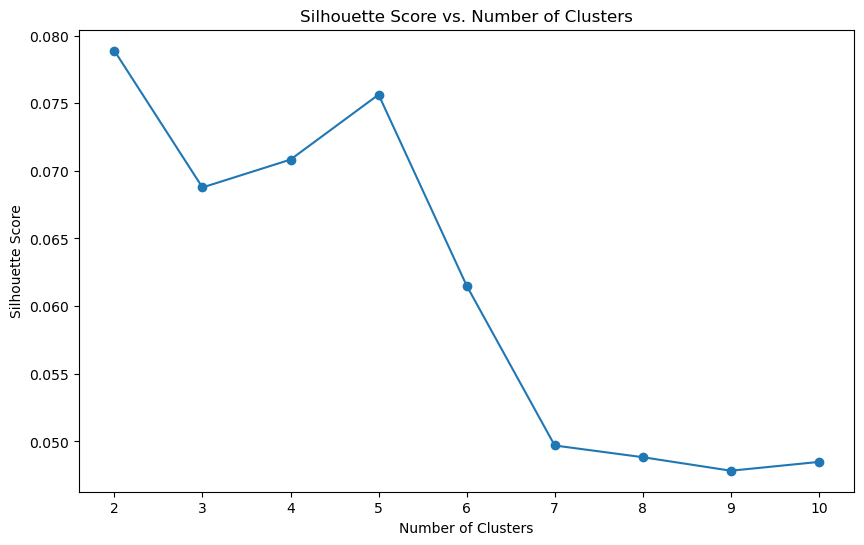

In [18]:
range_n_clusters = list(range(2, 11))  # Exploring 2 to 10 clusters
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(als_scaled)
    silhouette_avg = silhouette_score(als_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores to identify the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


The output plot reveals that the silhouette score is highest when the number of clusters is 2, suggesting that a 2-cluster solution might be the most distinct or separated for this dataset. However, the plot indicates a complex relationship between the number of clusters and silhouette scores, with some local variations, which suggests that choosing the optimal number of clusters might require additional considerations beyond just the highest silhouette score.

#### Choose Optimal Number of Clusters

In [19]:
# The optimal number of clusters is chosen based on the highest silhouette score
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_n_clusters}")

Optimal number of clusters: 2


Based on the silhouette analysis, the optimal number of clusters for the K-Means clustering of the ALS dataset is determined to be 2, as it yields the highest average silhouette score, indicating the best separation between the clusters.

#### Fit K-Means with Optimal Number of Clusters

In [22]:
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=10)
clusters = kmeans.fit_predict(als_scaled)

print("Kmean:", kmeans)
print("clusters:", clusters)

Kmean: KMeans(n_clusters=2, random_state=10)
clusters: [1 1 0 ... 1 1 0]


The K-Means clustering algorithm has been successfully fitted to the scaled ALS dataset with the optimal number of two clusters, resulting in each data point being assigned to one of two possible clusters, denoted by 0 or 1.

#### Fit PCA Transformation

In [24]:
pca = PCA(n_components=2)
als_pca = pca.fit_transform(als_scaled)

print("pca:", pca)
print("als_pca:", als_pca)

pca: PCA(n_components=2)
als_pca: [[-1.42671709 -2.32003521]
 [-1.44025336 -4.87036753]
 [ 1.61786934 -0.43073129]
 ...
 [-0.43288682  4.2453918 ]
 [-0.33076707  3.31610615]
 [ 1.46801117  0.58180473]]


The PCA transformation has been applied to the scaled ALS dataset, reducing its dimensionality to two principal components, which are now ready for visualization or further analysis.

#### Scatterplot of PCA-transformed Data

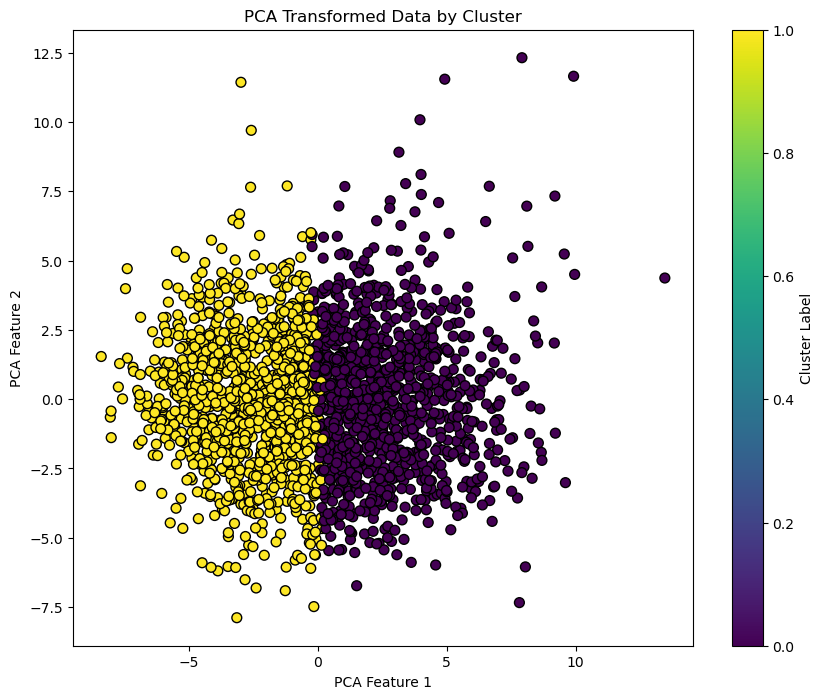

In [25]:
plt.figure(figsize=(10, 8))
plt.scatter(als_pca[:, 0], als_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('PCA Transformed Data by Cluster')
plt.colorbar(label='Cluster Label')
plt.show()

The scatterplot displays the ALS dataset transformed by PCA into two principal components, illustrating the clear separation between the clusters identified by the K-Means algorithm. Points are color-coded based on their cluster assignment, with one cluster in yellow and the other in purple, showing the grouping tendency of the data when reduced to two dimensions. The color bar reflects the cluster membership, enhancing the interpretability of the clustering results. This visual representation aids in understanding the underlying structure of the dataset and the relationships between patients in the context of ALS progression or subtypes.

# Conclusion
The clustering analysis of ALS patient data suggests distinct subgroups within the data, as indicated by the optimal number of clusters found. These subgroups represent different progression patterns or subtypes of ALS, offering potential insights for personalized treatment approaches or further research. Further analysis could explore the characteristics of each cluster in more detail.

References:

https://www.goodnet.org/articles/9-things-you-should-know-about-als-ice-water-bucket-challenge-list